## 1. Load Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('train.csv')
df.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 15 columns):
ID         333 non-null int64
crim       333 non-null float64
zn         333 non-null float64
indus      333 non-null float64
chas       333 non-null int64
nox        333 non-null float64
rm         333 non-null float64
age        333 non-null float64
dis        333 non-null float64
rad        333 non-null int64
tax        333 non-null int64
ptratio    333 non-null float64
black      333 non-null float64
lstat      333 non-null float64
medv       333 non-null float64
dtypes: float64(11), int64(4)
memory usage: 39.1 KB


## 2. Explore Measures of Centrality and Dispersion

In [3]:
df.describe()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,250.951952,3.360341,10.689189,11.293483,0.060060,0.557144,6.265619,68.226426,3.709934,9.633634,409.279279,18.448048,359.466096,12.515435,22.768769
std,147.859438,7.352272,22.674762,6.998123,0.237956,0.114955,0.703952,28.133344,1.981123,8.742174,170.841988,2.151821,86.584567,7.067781,9.173468
min,1.000000,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,188.000000,12.600000,3.500000,1.730000,5.000000
25%,123.000000,0.078960,0.000000,5.130000,0.000000,0.453000,5.884000,45.400000,2.122400,4.000000,279.000000,17.400000,376.730000,7.180000,17.400000
50%,244.000000,0.261690,0.000000,9.900000,0.000000,0.538000,6.202000,76.700000,3.092300,5.000000,330.000000,19.000000,392.050000,10.970000,21.600000
75%,377.000000,3.678220,12.500000,18.100000,0.000000,0.631000,6.595000,93.800000,5.116700,24.000000,666.000000,20.200000,396.240000,16.420000,25.000000
max,506.000000,73.534100,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,37.970000,50.000000


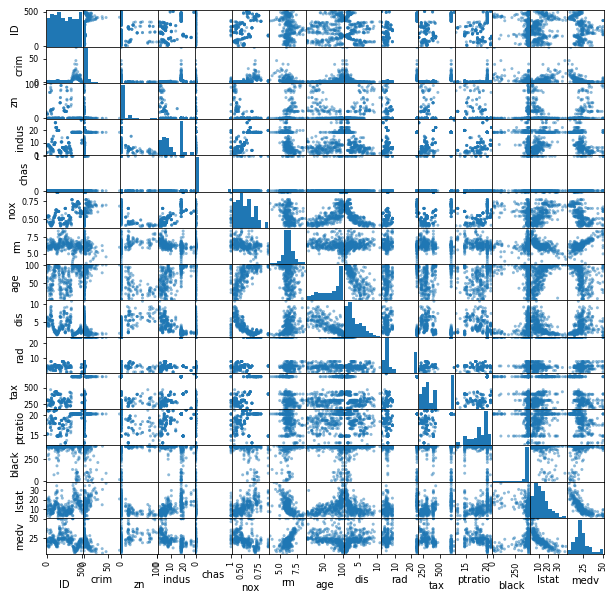

In [4]:
pd.plotting.scatter_matrix(df, figsize=(10,10));

### Average Number of Rooms per Dwelling

Text(0, 0.5, 'Number of Houses')

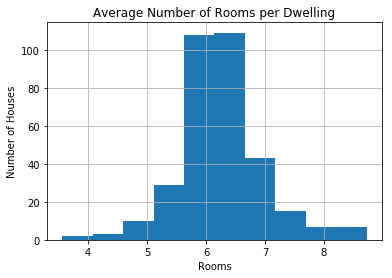

In [5]:
df.rm.hist()
plt.title('Average Number of Rooms per Dwelling')
plt.xlabel('Rooms')
plt.ylabel('Number of Houses')

Average number of rooms per dwelling is fairly normally distributed, with  median at approximately 6.2 rooms. The minimum number of rooms is 3.6 rooms, and the mamximum number of rooms is 8.7 rooms.

### Per Capita Crime Rate by Town


Text(0, 0.5, 'Number of Houses')

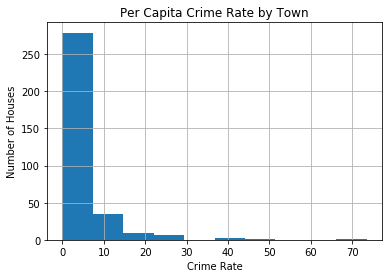

In [6]:
df.crim.hist()
plt.title('Per Capita Crime Rate by Town')
plt.xlabel('Crime Rate')
plt.ylabel('Number of Houses')

In [7]:
df.crim.quantile(.9)

9.958202

Most crime rates are well below 10. The 90th percentile of the crime rate is at 9.95. The maximum crime rate is 73.53.

### Proportion of Owner-Occupied Units Built Prior to 1940

Text(0, 0.5, 'Number of Houses')

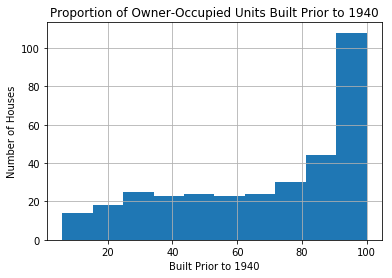

In [8]:
df.age.hist()
plt.title('Proportion of Owner-Occupied Units Built Prior to 1940')
plt.xlabel('Built Prior to 1940')
plt.ylabel('Number of Houses')

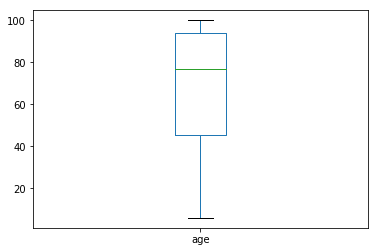

In [9]:
df.age.plot(kind='box')

In [10]:
df.age.quantile(.75) - df.age.quantile(.25)

48.4

The proportion of owner-occupited units built prior to 1940 is skewed to the right, with median of 76.7 and IQR of 48.4.



## 3. Create meaningful subsets of the data and Observe Differences


#### Bounded by the Charles River

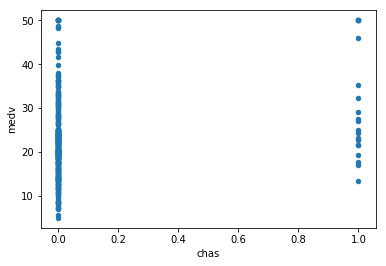

In [11]:
df.plot('chas', 'medv', kind='scatter')

Text(0, 0.5, 'Median Value of Homes in $10000s')

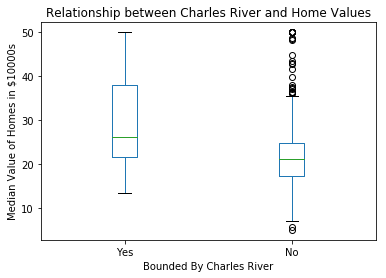

In [13]:
df_chas = df.loc[df.chas == 1]
df_nochas = df.loc[df.chas == 0]

data_chas = pd.DataFrame({'Yes':df_chas.medv,
                    'No':df_nochas.medv})
data_chas.plot.box()
plt.title('Relationship between Charles River and Home Values')
plt.xlabel('Bounded By Charles River')
plt.ylabel('Median Value of Homes in $10000s')

Text(0, 0.5, 'Median Value of Homes in $10000s')

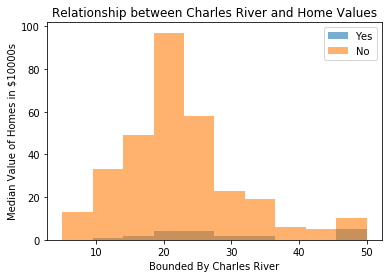

In [14]:
data_chas.plot.hist(alpha=0.6)
plt.title('Relationship between Charles River and Home Values')
plt.xlabel('Bounded By Charles River')
plt.ylabel('Median Value of Homes in $10000s')

The values of the houses next to the Charles River tend to be higher than those not bounded by the Charles River. There are outliers with high home values for those that are not next to the Charles River. However, whether or not the house is next to the Charles River doesn't 'split' the home values.

#### Crime Rate

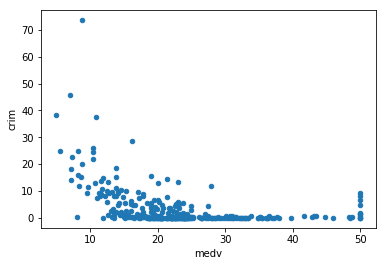

In [15]:
df.plot('medv', 'crim', kind='scatter')

Text(0, 0.5, 'Median Value of Homes in $10000s')

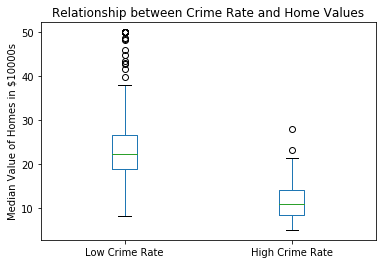

In [16]:
df_lowcrim = df.loc[df.crim <= df.crim.quantile(.9)]
df_hicrim = df.loc[df.crim > df.crim.quantile(.9)]

data_crim = pd.DataFrame({'Low Crime Rate':df_lowcrim.medv,
                    'High Crime Rate':df_hicrim.medv})
data_crim.plot.box()
plt.title('Relationship between Crime Rate and Home Values')
plt.ylabel('Median Value of Homes in $10000s')

Text(0, 0.5, 'Number of Houses')

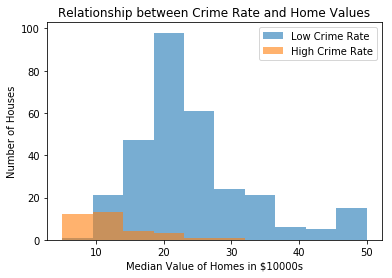

In [17]:
data_crim.plot.hist(alpha=0.6)
plt.title('Relationship between Crime Rate and Home Values')
plt.xlabel('Median Value of Homes in $10000s')
plt.ylabel('Number of Houses')

The houses with the highest crime rates (top 10 percentile) have lowest home values.

#### Proportion of non-retail business in town and nitrogen oxides concentration

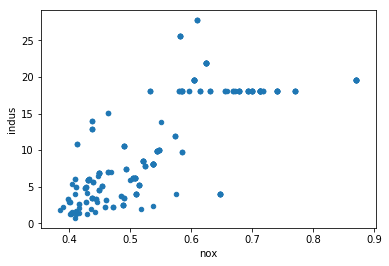

In [18]:
df.plot('nox', 'indus', kind='scatter')

Text(0, 0.5, 'Proportion of Non-Retail Businesses in Town')

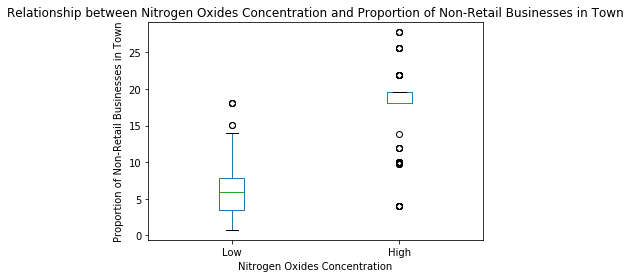

In [19]:
df_lownox = df.loc[df.nox <= df.nox.quantile(.5)]
df_hinox = df.loc[df.nox > df.nox.quantile(.5)]

data_nox = pd.DataFrame({'Low':df_lownox.indus,
                    'High':df_hinox.indus})
data_nox.plot.box()
plt.title('Relationship between Nitrogen Oxides Concentration and Proportion of Non-Retail Businesses in Town')
plt.xlabel('Nitrogen Oxides Concentration')
plt.ylabel('Proportion of Non-Retail Businesses in Town')

Text(0, 0.5, 'Proportion of Non-Retail Businesses in Town')

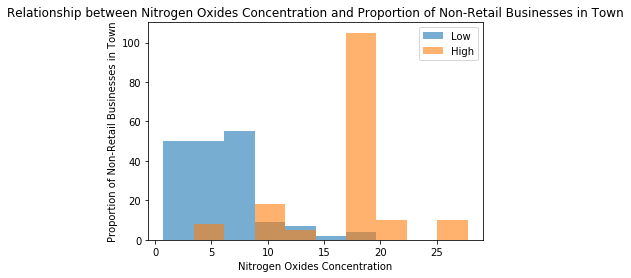

In [20]:
data_nox.plot.hist(alpha=0.6)
plt.title('Relationship between Nitrogen Oxides Concentration and Proportion of Non-Retail Businesses in Town')
plt.xlabel('Nitrogen Oxides Concentration')
plt.ylabel('Proportion of Non-Retail Businesses in Town')

Areas with higher nitrogen oxides concentration tend to have higher proportion of non-retail businesses in town.